## 1. Tải các gói thư viện

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 2. Đọc dữ liệu

In [4]:
df = pd.read_excel("D:/Đồ án 2 Thầy Trị/Đồ Án 2/weatherbit_hanoi_2024.xlsx")
df.head(5)

,Mốc thời gian,Mức độ mây che phủ,Điểm sương,Bức xạ khuếch tán ngang(DHI),Bức xạ trực tiếp bình thường(DNI),Bức xạ mặt trời toàn phần ngang(GHI),max_dhi,max_dni,max_ghi,Bức xạ mặt trời tổng,...,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,Áp suất mặt biển chuẩn,Trạng thái cập nhật dữ liệu,Lượng tuyết rơi,Độ sâu tuyết tích tụ
0,2023-12-31,79,18.9,40,329,207,116,911,764,78,...,3.6,0.9,0.0,0.0,1016,82,1017,final,0,0
1,2024-01-01,59,18.1,40,329,207,116,912,764,189,...,7.6,1.6,0.0,0.0,1015,79,1017,final,0,0
2,2024-01-02,77,19.6,40,329,208,116,912,765,149,...,7.4,1.4,0.0,0.0,1015,81,1016,final,0,0
3,2024-01-03,80,15.4,40,329,208,116,912,767,50,...,10.4,1.8,0.0,0.0,1018,79,1019,final,0,0
4,2024-01-04,100,14.0,40,330,209,116,913,768,69,...,6.0,1.4,0.0,0.0,1018,71,1019,final,0,0


## 3. Tiền xử lý dữ liệu

In [3]:
df.shape

(365, 34)

In [4]:
df.dtypes

Mốc thời gian                                           datetime64[ns]
Mức độ mây che phủ                                               int64
Điểm sương                                                     float64
Bức xạ khuếch tán ngang(DHI)                                     int64
Bức xạ trực tiếp bình thường(DNI)                                int64
Bức xạ mặt trời toàn phần ngang(GHI)                             int64
max_dhi                                                          int64
max_dni                                                          int64
max_ghi                                                          int64
Bức xạ mặt trời tổng                                             int64
Giá trị dự đoán bức xạ khuếch tán ngang(DHI)                     int64
Giá trị dự đoán bức xạ trực tiếp bình thường(DNI)                int64
Giá trị dự đoán bức xạ mặt trời toàn phần ngang(GHI)             int64
Giá trị dự đoán bức xạ mặt trời tổng                             int64
Nhiệt 

In [5]:
df.describe()

,Mốc thời gian,Mức độ mây che phủ,Điểm sương,Bức xạ khuếch tán ngang(DHI),Bức xạ trực tiếp bình thường(DNI),Bức xạ mặt trời toàn phần ngang(GHI),max_dhi,max_dni,max_ghi,Bức xạ mặt trời tổng,...,Hướng gió tại thời điểm gió mạnh nhất,Thời điểm có hướng gió mạnh nhất,Hướng gió hiện tại,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,Áp suất mặt biển chuẩn
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2024-06-30 22:05:35.342465792,70.284932,21.291233,47.484932,378.539726,289.800000,123.542466,935.021918,955.005479,146.030137,...,180.342466,1.719804e+09,180.342466,7.273699,1.576164,6.732603,6.732603,1009.608219,79.364384,1010.509589
min,2023-12-31 00:00:00,0.000000,3.300000,40.000000,326.000000,205.000000,115.000000,909.000000,757.000000,21.000000,...,50.000000,1.704006e+09,50.000000,2.800000,0.600000,0.000000,0.000000,992.000000,52.000000,993.000000
25%,2024-04-01 00:00:00,56.000000,18.200000,43.000000,348.000000,241.000000,120.000000,928.000000,854.000000,75.000000,...,140.000000,1.711969e+09,140.000000,6.000000,1.200000,0.000000,0.000000,1004.000000,75.000000,1004.000000
50%,2024-07-01 00:00:00,75.000000,23.300000,48.000000,382.000000,304.000000,126.000000,937.000000,1007.000000,120.000000,...,161.000000,1.719803e+09,161.000000,7.200000,1.500000,0.500000,0.500000,1009.000000,81.000000,1010.000000
75%,2024-09-30 00:00:00,90.000000,25.800000,52.000000,412.000000,339.000000,126.000000,942.000000,1050.000000,211.000000,...,216.000000,1.727669e+09,216.000000,8.400000,1.800000,6.500000,6.500000,1015.000000,85.000000,1016.000000
max,2024-12-30 00:00:00,100.000000,28.300000,53.000000,419.000000,346.000000,128.000000,956.000000,1062.000000,337.000000,...,348.000000,1.735538e+09,348.000000,25.600000,5.600000,114.500000,114.500000,1028.000000,95.000000,1029.000000
std,NaN,24.795336,5.539457,4.778951,32.745551,50.541257,4.083803,13.226869,109.123732,84.634519,...,62.289738,9.125741e+06,62.289738,2.019144,0.511147,14.651250,14.651250,7.099949,8.757185,7.123560


In [6]:
print('Null Values =', df.isnull().values.any())

Null Values = False


## 4. Trực quan hóa dữ liệu

### 4.1. Biểu đồ xu hướng

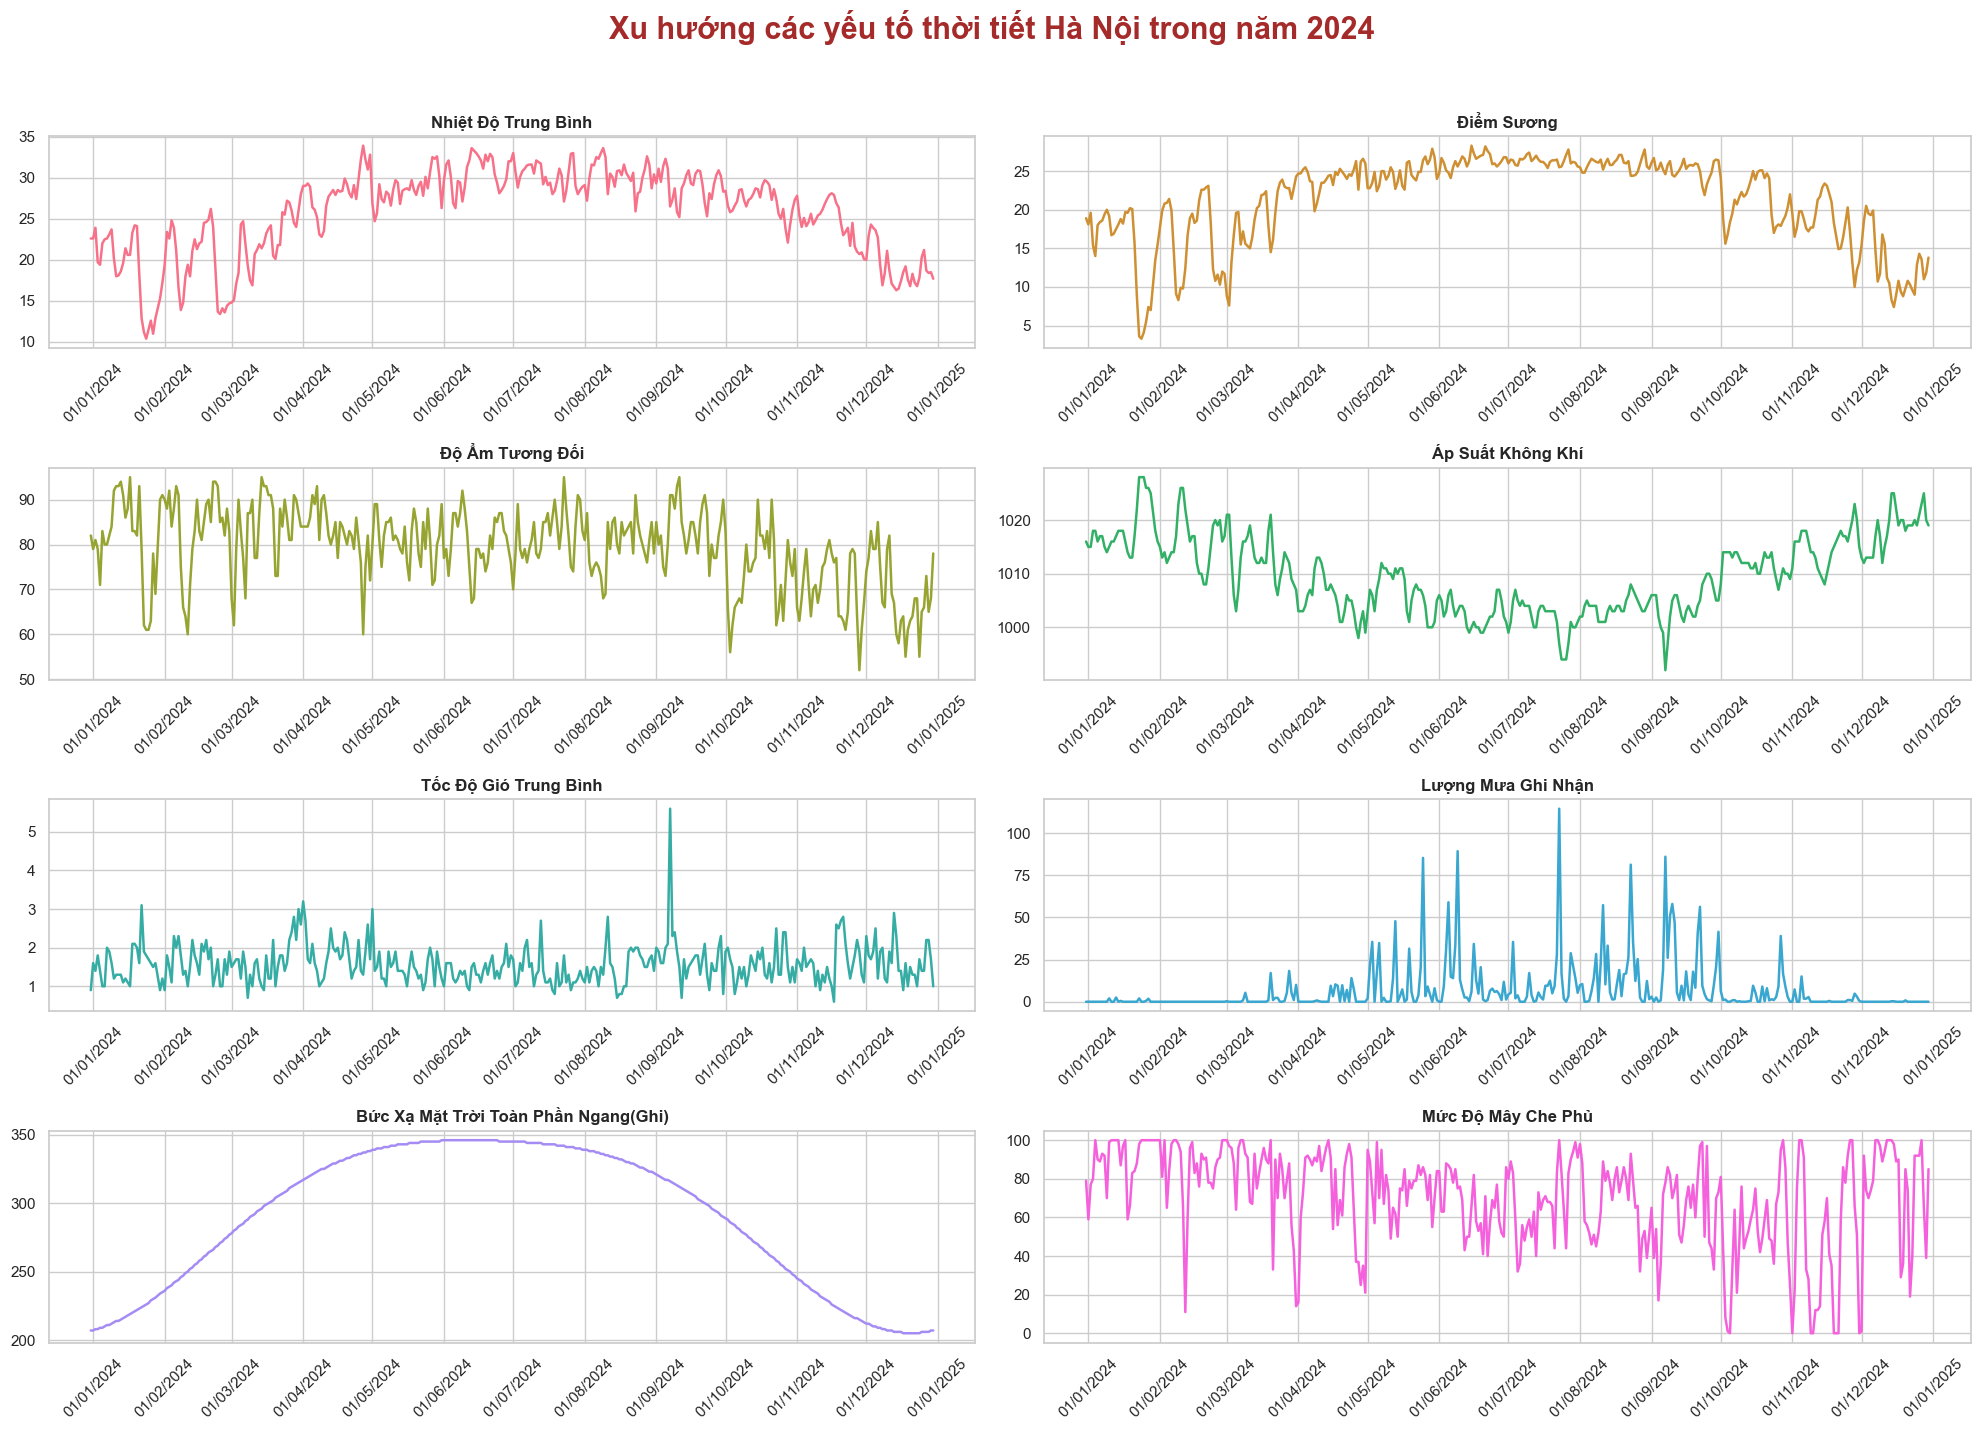

In [7]:
df['Mốc thời gian'] = pd.to_datetime(df['Mốc thời gian'], errors='coerce')

columns_to_plot = [
    "Nhiệt độ trung bình",
    "Điểm sương",
    "Độ ẩm tương đối",
    "Áp suất không khí",
    "Tốc độ gió trung bình",
    "Lượng mưa ghi nhận",
    "Bức xạ mặt trời toàn phần ngang(GHI)",
    "Mức độ mây che phủ"
]

sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(columns_to_plot))
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    sns.lineplot(data=df, x='Mốc thời gian', y=col, ax=ax, color=palette[i], linewidth=1.8)

    ax.set_title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.tick_params(axis='x', rotation=45)

if len(columns_to_plot) < len(axes):
    fig.delaxes(axes[-1])

plt.suptitle('Xu hướng các yếu tố thời tiết Hà Nội trong năm 2024', fontsize=22, fontweight='bold', y=1.02, color='brown')
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

### 4.2. Biểu đồ phân tán

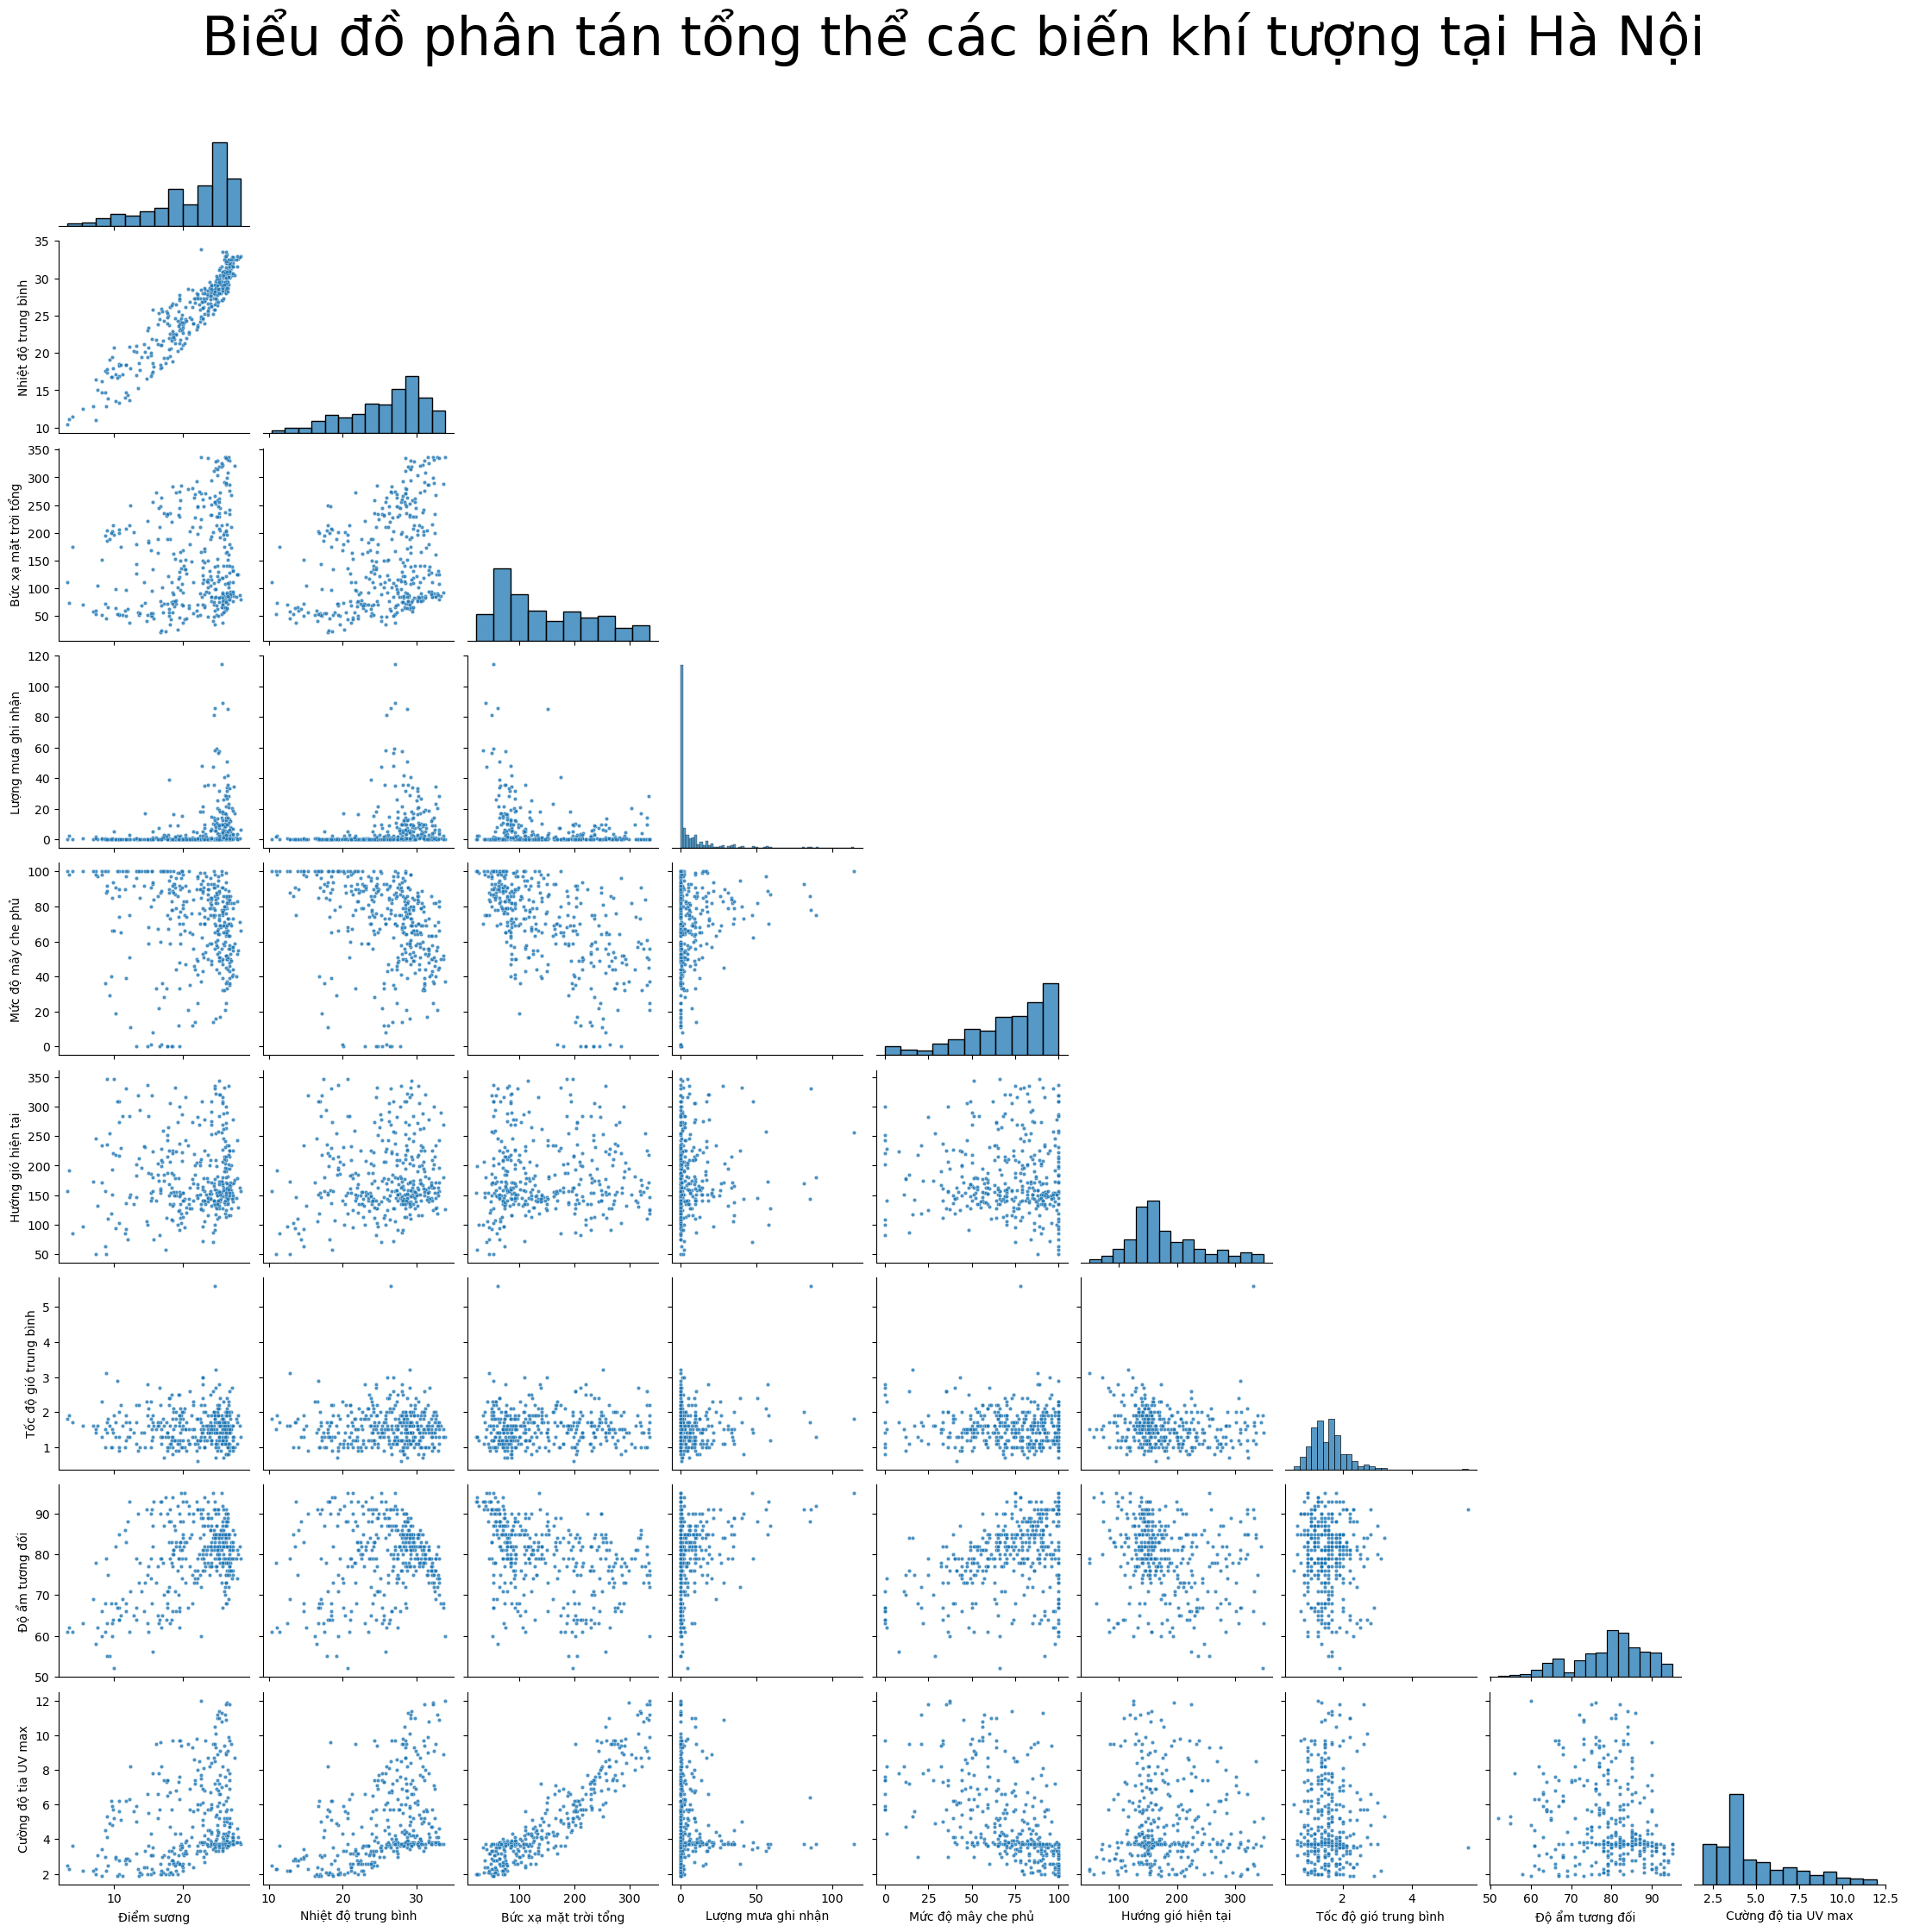

In [5]:
# chọn cột
col = [
    "Điểm sương",
    "Nhiệt độ trung bình",
    "Bức xạ mặt trời tổng",
    "Lượng mưa ghi nhận",
    "Mức độ mây che phủ",
    "Hướng gió hiện tại",
    "Tốc độ gió trung bình",
    "Độ ẩm tương đối",
    "Cường độ tia UV max"
]

# trích xuất + làm sạch dữ liệu
df_selected = df[col].copy()
df_selected = df_selected.select_dtypes(include=["number"])
df_selected = df_selected.dropna()

# vẽ biểu đồ phân tán
sns.pairplot(df_selected, corner=True, plot_kws={'alpha': 0.8, 's': 10})
plt.suptitle("Biểu đồ phân tán tổng thể các biến khí tượng tại Hà Nội", fontsize=45, y=1, color="black")
plt.show()

### 4.2. Biểu đồ nhiệt

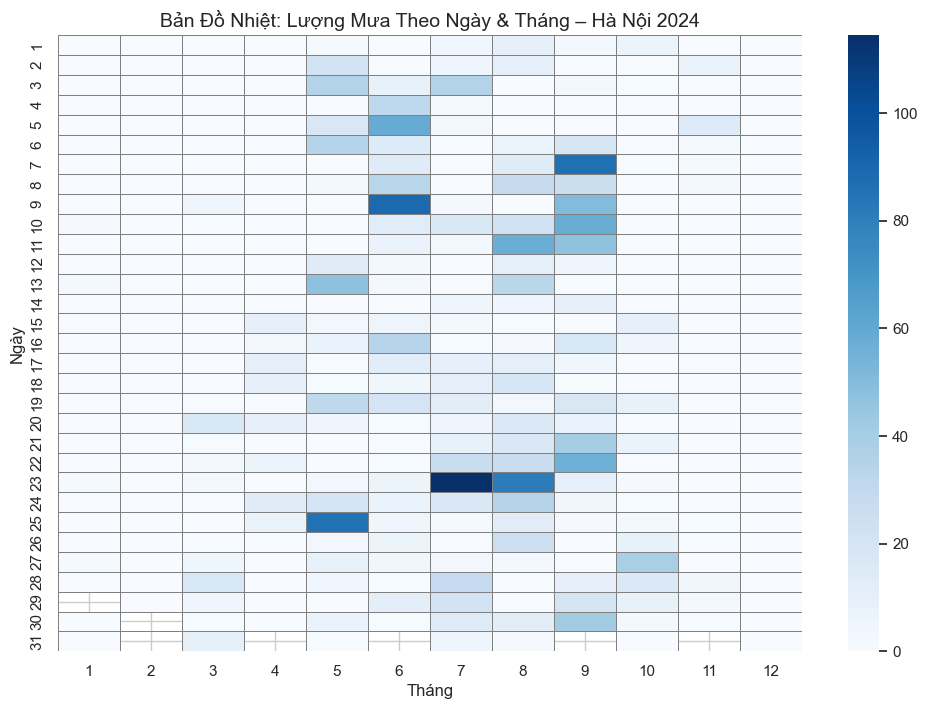

In [8]:
df['tháng'] = df['Mốc thời gian'].dt.month
df['ngày'] = df['Mốc thời gian'].dt.day


pivot_rain = df.pivot_table(index='ngày', columns='tháng', values='Lượng mưa ghi nhận', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_rain, cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('Bản Đồ Nhiệt: Lượng Mưa Theo Ngày & Tháng – Hà Nội 2024', fontsize=14)
plt.xlabel('Tháng')
plt.ylabel('Ngày')
plt.show()


### 4.3. Ma trận tương quan

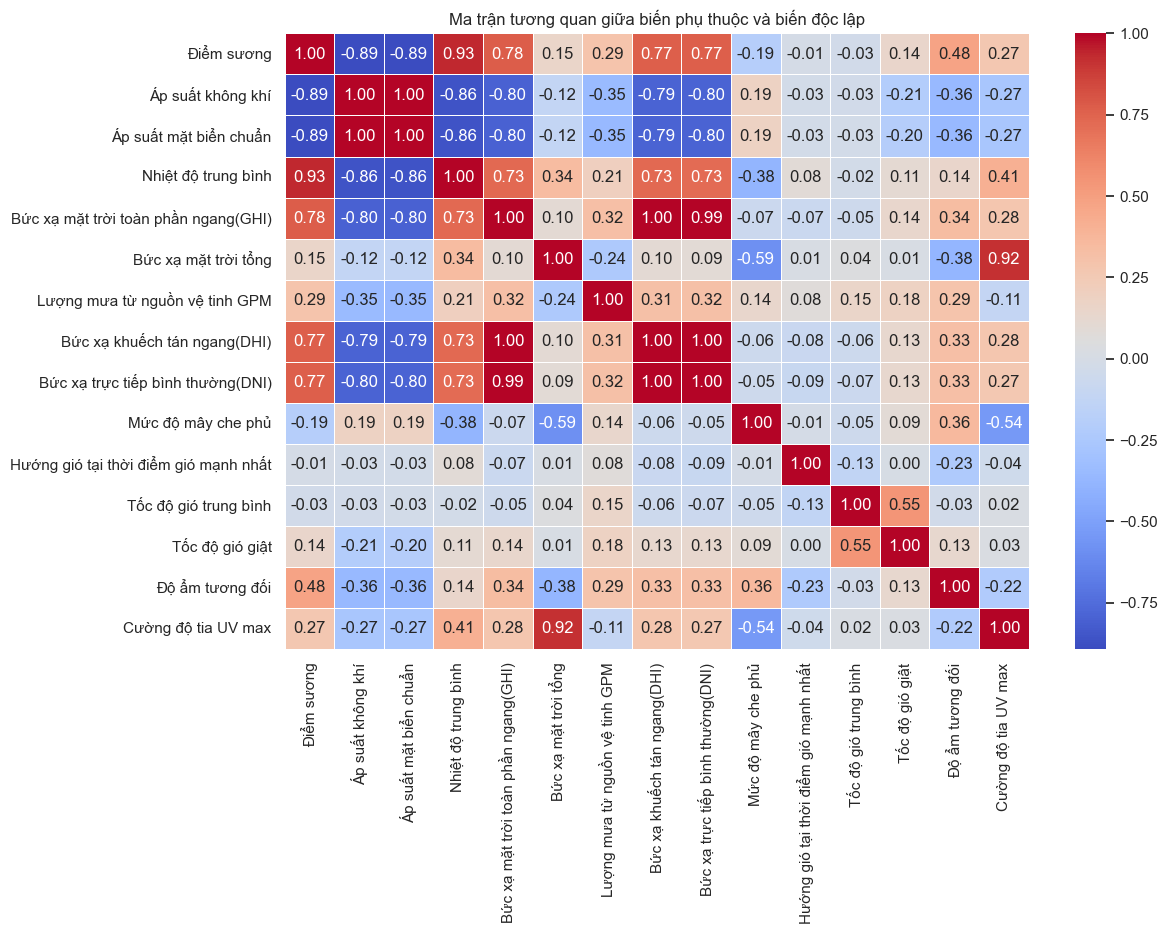

In [9]:
col = [
    "Điểm sương",
    "Áp suất không khí",
    "Áp suất mặt biển chuẩn",
    "Nhiệt độ trung bình",
    "Bức xạ mặt trời toàn phần ngang(GHI)",
    "Bức xạ mặt trời tổng",
    "Lượng mưa từ nguồn vệ tinh GPM",
    "Bức xạ khuếch tán ngang(DHI)",
    "Bức xạ trực tiếp bình thường(DNI)",
    "Mức độ mây che phủ",
    "Hướng gió tại thời điểm gió mạnh nhất",
    "Tốc độ gió trung bình",
    "Tốc độ gió giật",
    "Độ ẩm tương đối",
    "Cường độ tia UV max"
]


# Lọc DataFrame chỉ lấy các cột thuộc features và targets
df_corr = df[col]

# Tính ma trận tương quan giữa tất cả các biến
corr_matrix = df_corr.corr()

# Lấy ma trận tương quan giữa biến phụ thuộc (targets) và biến độc lập (features)
corr_submatrix = corr_matrix.loc[col]

# Vẽ heatmap ma trận tương quan này
plt.figure(figsize=(12, 8))
sns.heatmap(corr_submatrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Ma trận tương quan giữa biến phụ thuộc và biến độc lập')
plt.show()